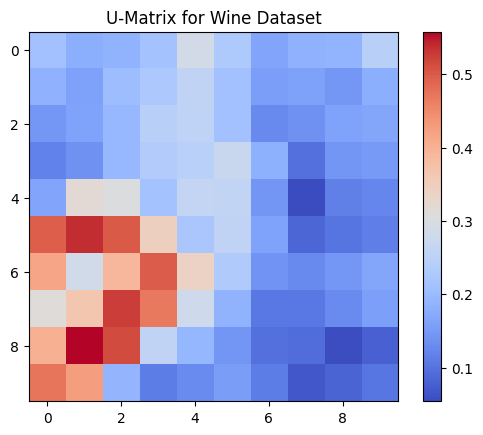

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler

# Load Wine dataset
wine = load_wine()
X = wine.data

# Normalize the dataset
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Define SOM parameters
grid_size = (10, 10)  # 10x10 grid
input_dim = X.shape[1]
learning_rate = 0.5
radius = max(grid_size) / 2
num_epochs = 100

# Initialize weight vectors randomly
som_weights = np.random.rand(grid_size[0], grid_size[1], input_dim)

# Function to find Best Matching Unit (BMU)
def find_bmu(x):
    distances = np.linalg.norm(som_weights - x, axis=2)
    return np.unravel_index(np.argmin(distances), distances.shape)

# Function to update weights
def update_weights(x, bmu, epoch):
    global learning_rate, radius
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            dist_to_bmu = np.linalg.norm(np.array([i, j]) - np.array(bmu))
            if dist_to_bmu < radius:
                influence = np.exp(-dist_to_bmu**2 / (2 * (radius**2)))
                som_weights[i, j] += learning_rate * influence * (x - som_weights[i, j])

    # Decay learning rate and radius
    learning_rate *= 0.99
    radius *= 0.99

# Training the SOM
for epoch in range(num_epochs):
    for x in X:
        bmu = find_bmu(x)
        update_weights(x, bmu, epoch)

# Visualization (U-Matrix)
u_matrix = np.zeros(grid_size)
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        neighbors = []
        if i > 0: neighbors.append(som_weights[i-1, j])
        if i < grid_size[0]-1: neighbors.append(som_weights[i+1, j])
        if j > 0: neighbors.append(som_weights[i, j-1])
        if j < grid_size[1]-1: neighbors.append(som_weights[i, j+1])
        u_matrix[i, j] = np.mean([np.linalg.norm(som_weights[i, j] - n) for n in neighbors])

plt.imshow(u_matrix, cmap='coolwarm')
plt.colorbar()
plt.title("U-Matrix for Wine Dataset")
plt.show()

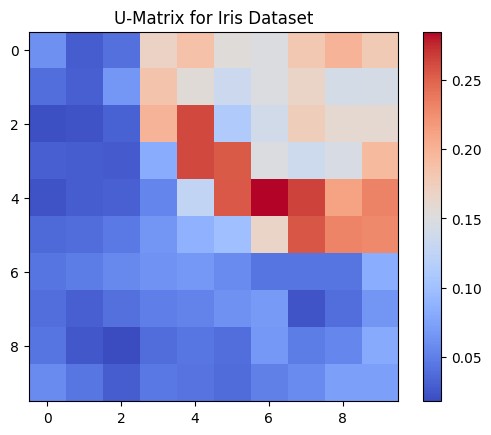

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

# Load Iris dataset
iris = load_iris()
X = iris.data

# Normalize the dataset
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Define SOM parameters
grid_size = (10, 10)  # 10x10 grid
input_dim = X.shape[1]
learning_rate = 0.5
radius = max(grid_size) / 2
num_epochs = 100

# Initialize weight vectors randomly
som_weights = np.random.rand(grid_size[0], grid_size[1], input_dim)

# Function to find Best Matching Unit (BMU)
def find_bmu(x):
    distances = np.linalg.norm(som_weights - x, axis=2)
    return np.unravel_index(np.argmin(distances), distances.shape)

# Function to update weights
def update_weights(x, bmu, epoch):
    global learning_rate, radius
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            dist_to_bmu = np.linalg.norm(np.array([i, j]) - np.array(bmu))
            if dist_to_bmu < radius:
                influence = np.exp(-dist_to_bmu**2 / (2 * (radius**2)))
                som_weights[i, j] += learning_rate * influence * (x - som_weights[i, j])

    # Decay learning rate and radius
    learning_rate *= 0.99
    radius *= 0.99

# Training the SOM
for epoch in range(num_epochs):
    for x in X:
        bmu = find_bmu(x)
        update_weights(x, bmu, epoch)

# Visualization (U-Matrix)
u_matrix = np.zeros(grid_size)
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        neighbors = []
        if i > 0: neighbors.append(som_weights[i-1, j])
        if i < grid_size[0]-1: neighbors.append(som_weights[i+1, j])
        if j > 0: neighbors.append(som_weights[i, j-1])
        if j < grid_size[1]-1: neighbors.append(som_weights[i, j+1])
        u_matrix[i, j] = np.mean([np.linalg.norm(som_weights[i, j] - n) for n in neighbors])

plt.imshow(u_matrix, cmap='coolwarm')
plt.colorbar()
plt.title("U-Matrix for Iris Dataset")
plt.show()
